# Best Neighborhood in Pittsburgh: FINAL REPORT

Team Zel, Neal, and Q

## Introduction

Using the datasets provided by the WPRDC, we narrowed down the factors to determine the best neighborhood in Pittsburgh to the following:

- Public Assistance Income (add links to datasets for each of these?)
- Criminal Activity
- Number of Trees

Public Assistance Income (PAI) was included as a sub-metric because we believed it was an efficient attribute to describe the flow of income in each city, whereas the more PAI a neighborhood recieves, is presumably equivalent to a lower average income. We considered the idea that neighborhoods with a higher average income will Neighborhoods with lower percentages are considered the “best” under this sub-metric because they have fewer households depending on government income assistance.

(Explanation of Neal's Submetrics + How they relate to "best" neighborhood)

(Explanation of Q's Submetrics + How the relate to "best" neighbordhood)

## The Metric

Our overall submetric is socio-economic conditions of each neighborhood. We determined our metric by looking at the following items:

### Public Assistance Income
For the percentage of public assistance, we calculated it by dividing the total households on PAI by the total households in each neighborhood and multiplying by 100. To normalize the metric, we created a 0–1 "point system", where a lower score indicates less reliance on public assistance and a higher ranking for economic stability. This helped us compare neighborhoods fairly, regardless of their size.
Some neighborhood names were unusual or did not correspond directly to recognized Pittsburgh neighborhoods, so these were treated as outliers in the analysis. Neighborhoods with very small populations were also noted, as a few households on assistance could disproportionately affect the percentage.

After applying this metric, the neighborhood with the lowest percentage of households receiving public assistance (the “winner” for this submetric) is Charter’s City, while neighborhoods with higher percentages show greater reliance on assistance. This submetric provides a useful perspective on economic stability across Pittsburgh neighborhoods, even if it is only one part of the overall comparison.

### (Neal's Submetric)

### (Q's Submetric)

## So The Best Neighborhood Is.....

To find our best neighborhood, we created a Google Sheet and put all of our ranked submetrics in, with the neighborhoods listed in alphabetical order. We made a point system where we take the ranks of all of the neighborhoods of the submetrics and added them together (Example: Shadyside is ranked 74 for crime rates, 8 for PAI, and 5 for trees, so its total point amount is 87 ), then we took the total points and found the average (divided by 3). The neighborhood with the least average points is considered the “best”. The neighborhood we got using this system was Squirrel Hill North, with a average of 16 points. Our chart is below:

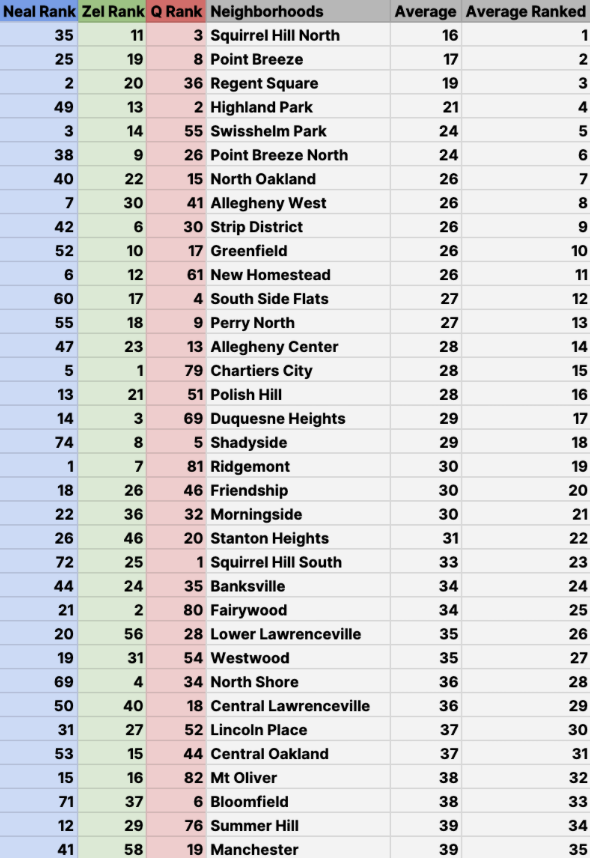

In [1]:
from IPython.display import Image
Image("chart.png")

## CONCLUSION

Aihzel's Conclusion: 
Squirrel Hill is my favorite area in Pittsburgh because of the cozy, tree-lined streets, the welcoming community, and the variety of local shops and restaurants that make it feel lively but still peaceful. I had no idea, however, that the neighborhoods in it were split between North and South, which was surprising and made me realize how much I didn’t know about the city’s layout. Looking at the data-driven determination of the “best neighborhood,” I kind of expected either Squirrel Hill or Shadyside to win, because they aren’t overly crowded, have many shops and amenities, and are visually pleasing places to live. The data made me think differently, though, because it considers factors like crime rates, income, and access to services—things I might not notice just from spending time in the area. While my personal favorite is based on comfort, aesthetics, and convenience, the data shows a more objective perspective, highlighting qualities I might overlook, but that affect overall livability.

Neal's Conclusion:

Q's Conclusion:

## DATA

### Aihzel's Data (Public Assistance Income)

We start by importing pandas and getting matplotlib ready to go. Then we import the data using the WPRDC link as follows. We then inspect the data by printing it,and then only keeping the relevant columns. We then rename them for easier reference, and delete any rows with missing data: We calculate the percentage of households in each neighborhood that recieve PAI, and then we sort the neighborhoods by how much PAI they recieve, least to greatest. We then plot these neighborhoods using a bar chart, and print out the neighborhood that recieves the least PAI.



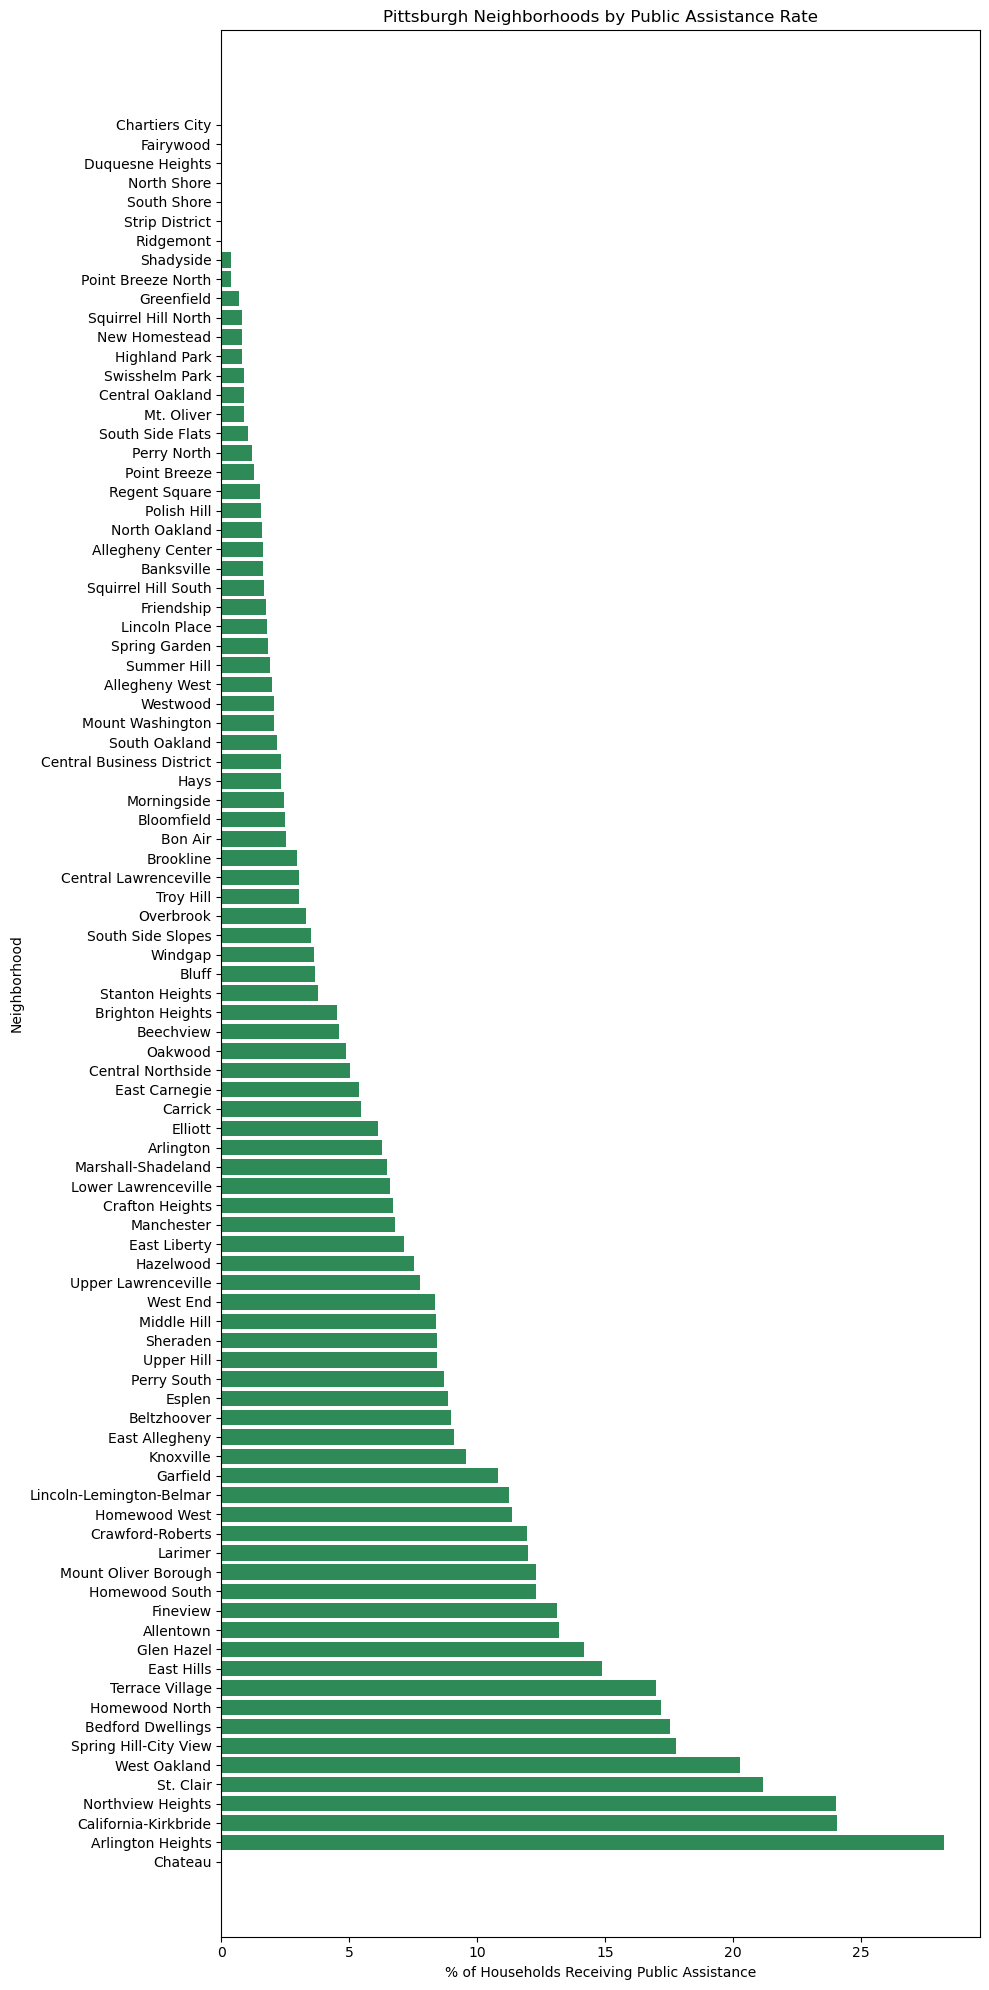

Best Neighborhood (Public Assistance metric): Chartiers City
→ 0.00% of households receive public assistance


In [4]:
# import pandas for data manipulation, matplotlib for data visualization
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# load dataset from WPRDC URL
acs_url = "https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/38a5632d-1355-492c-8735-51bf68bdff13/download/public-assistance-income-in-the-past-12-months-for-households.csv"
acs = pd.read_csv(acs_url)

# keeps only relevant columns (neighborhood name, total households, and households receiving public assistance income)
acs.columns = acs.columns.str.strip()

# renaming columns for easier reference
acs = acs[['Neighborhood', 
           'Estimate; Total:', 
           'Estimate; Total: - With public assistance income']]

acs = acs.rename(columns={
    'Neighborhood': 'neighborhood',
    'Estimate; Total:': 'total_households_est',
    'Estimate; Total: - With public assistance income': 'public_assist_est'
})

# remove rows with missing data
acs = acs.dropna(subset=['public_assist_est', 'total_households_est'])

# calculate % of households on public assistance
acs['pct_public_assist'] = (acs['public_assist_est'] / acs['total_households_est']) * 100

# sort neighborhoods by % public assistance
ranked = acs.sort_values('pct_public_assist')

# plot all neighborhoods

plt.figure(figsize=(10, 20))  # taller figure to fit all names
plt.barh(ranked['neighborhood'], ranked['pct_public_assist'], color='seagreen')
plt.gca().invert_yaxis()
plt.xlabel("% of Households Receiving Public Assistance")
plt.ylabel("Neighborhood")
plt.title("Pittsburgh Neighborhoods by Public Assistance Rate")
plt.tight_layout()
plt.show()

# print best (lowest assistance) neighborhood
best = ranked.iloc[0]
print(f"Best Neighborhood (Public Assistance metric): {best['neighborhood']}")
print(f"→ {best['pct_public_assist']:.2f}% of households receive public assistance")



Table Data:

In [6]:
ranked[['neighborhood', 'pct_public_assist']]


,neighborhood,pct_public_assist
20,Chartiers City,0.000000
31,Fairywood,0.000000
24,Duquesne Heights,0.000000
57,North Shore,0.000000
71,South Shore,0.000000
...,...,...
78,St. Clair,21.153846
58,Northview Heights,24.029126
14,California-Kirkbride,24.054983
4,Arlington Heights,28.235294
